In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
import cv2
from scipy.stats import stats
import matplotlib.image as mpimg
import os

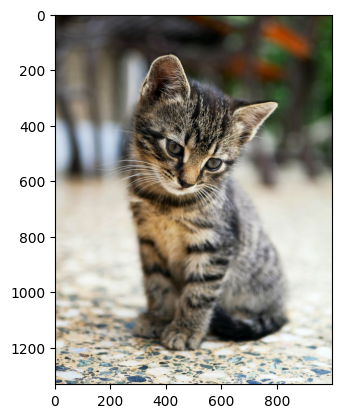

In [3]:
# Import our image
# Convert BGR to RGB color space. OpenCV default reads in the image as BGR
image = cv2.cvtColor(cv2.imread('cat.jpg'), cv2.COLOR_BGR2RGB)
plt.imshow(image)
plt.show()

In [4]:
# Checking the dimensions of the photo
print(image.shape)

# Getting the aspect ratio of the original image to make sure our plots and output figure are correct
aspect_ratio = image.shape[0]/image.shape[1]
print(aspect_ratio)


(1333, 1000, 3)
1.333


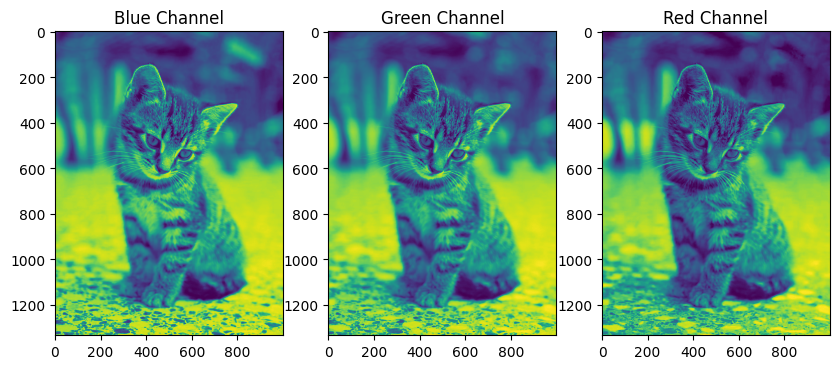

In [5]:
# Split the image into the 3 separate channels
# Blue, green then red because of the earlier conversion
blue, green, red = cv2.split(image)

# Plot the image
# Can change the height and the rest of the code runs fine
height = 10
width = height/aspect_ratio
fig = plt.figure(figsize = (height, width))

# Add subplot: 1 row, 3 columnes, first image
fig.add_subplot(131)
plt.title("Blue Channel")
plt.imshow(blue)

fig.add_subplot(132)
plt.title("Green Channel")
plt.imshow(green)

fig.add_subplot(133)
plt.title("Red Channel")
plt.imshow(red)

plt.show()

In [6]:
# blue_temp_df = pd.DataFrame(data = blue)
# blue_temp_df


In [7]:
red_temp_df = pd.DataFrame(data = red)
red_temp_df

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,26,26,23,23,22,21,19,19,16,16,...,29,29,29,30,28,29,29,30,30,30
1,25,25,23,22,22,21,19,18,17,16,...,29,29,29,30,28,29,29,30,30,30
2,25,25,23,22,22,21,19,18,17,16,...,29,29,29,30,28,29,29,30,30,30
3,23,24,22,21,21,20,18,18,16,15,...,29,29,29,30,28,29,29,30,30,30
4,22,22,21,21,20,19,17,17,16,15,...,29,27,29,30,28,29,29,30,30,30
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,65,64,72,84,88,97,109,119,123,138,...,225,222,219,226,230,229,232,222,212,221
1329,111,109,115,131,154,154,155,157,157,157,...,228,224,220,222,225,227,228,227,227,215
1330,151,152,155,156,169,170,170,168,166,166,...,229,225,222,224,223,219,200,192,200,186
1331,124,147,162,163,164,166,167,169,169,169,...,230,226,225,225,224,224,218,195,165,159


In [8]:
green_temp = pd.DataFrame(data = green)
green_temp

,0,1,2,3,4,5,6,7,8,9,...,990,991,992,993,994,995,996,997,998,999
0,32,32,32,32,31,30,29,29,27,27,...,71,71,73,73,74,76,77,78,79,79
1,31,31,32,31,31,30,29,28,28,27,...,71,71,73,73,74,76,77,78,79,79
2,31,31,32,31,31,30,29,28,28,27,...,71,71,72,73,74,76,77,78,79,79
3,32,30,31,30,30,29,28,28,27,26,...,71,71,72,73,74,76,77,78,79,79
4,31,31,30,30,29,28,27,27,27,26,...,71,72,72,73,74,76,76,78,79,79
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1328,43,42,50,67,74,86,100,110,118,130,...,237,236,232,239,243,241,244,234,224,233
1329,105,103,114,131,159,161,163,166,166,166,...,241,236,233,235,238,241,242,241,241,229
1330,170,173,178,183,196,196,196,194,192,192,...,242,238,236,238,237,235,216,208,216,202
1331,155,178,199,205,203,203,204,204,204,204,...,241,239,239,239,240,240,234,211,181,175


In [9]:
# Normalization:
# Top value is 255 (0-255 for colors), so dividing by that to get values from 0-1
df_blue = blue/255
df_red = red/255
df_green = green/255

In [10]:
# Reduces dimensionality to 50 dimensions
components = 150
pca_b = PCA(n_components= components)

# Train the PCA model on the data provided for the dataframe
pca_b.fit(df_blue)

# Transforms original data using the PCA model
trans_pca_b = pca_b.transform(df_blue)

pca_g = PCA(n_components=components)
pca_g.fit(df_green)
trans_pca_g = pca_g.transform(df_green)

pca_r = PCA(n_components=components)
pca_r.fit(df_red)
trans_pca_r = pca_r.transform(df_red)

In [11]:
print(trans_pca_b.shape)
print(trans_pca_g.shape)
print(trans_pca_r.shape)

(1333, 150)
(1333, 150)
(1333, 150)


In [12]:
# Keeping x amount of variation with the principal components
print(f"Blue Channel: {sum(pca_b.explained_variance_ratio_)}")
print(f"Green Channel: {sum(pca_g.explained_variance_ratio_)}")
print(f"Red Channel: {sum(pca_r.explained_variance_ratio_)}")

Blue Channel: 0.993498993935603
Green Channel: 0.9936100342695403
Red Channel: 0.9938143618230431


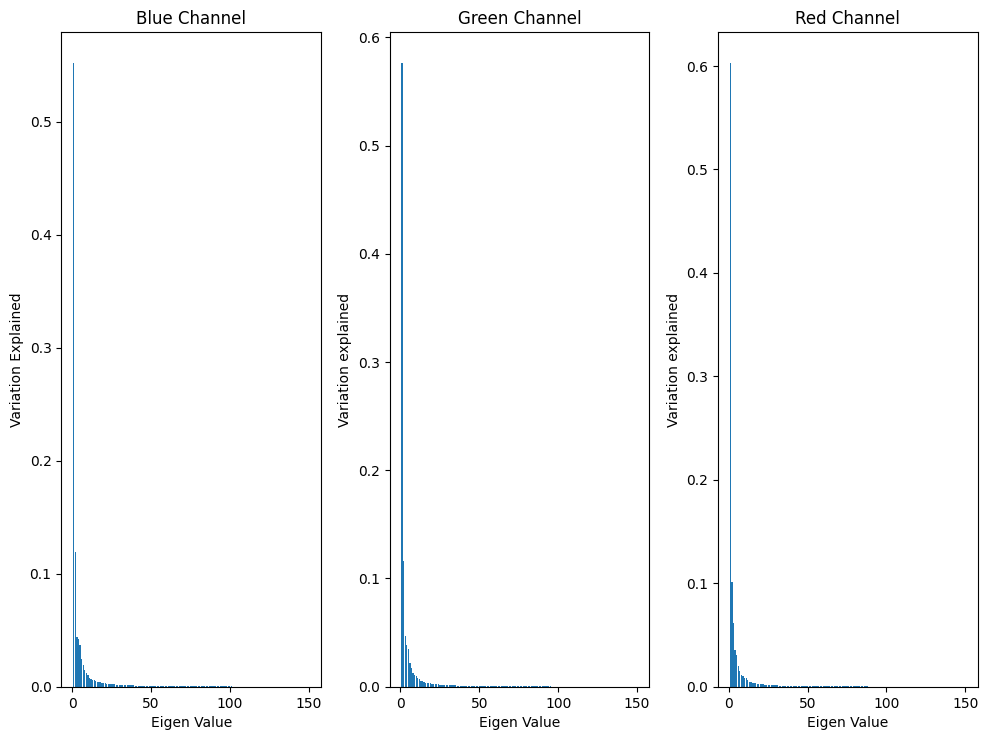

In [13]:
# Plot the explained variance versus the Eigen Value for each of the color channels (RGB)
fig = plt.figure(figsize = (height, width))
fig.add_subplot(131)
plt.title("Blue Channel")
plt.xlabel("Eigen Value")
plt.ylabel("Variation Explained")
plt.bar(list(range(1,components+1)), pca_b.explained_variance_ratio_)

fig.add_subplot(132)
plt.title("Green Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,components+1)),pca_g.explained_variance_ratio_)

fig.add_subplot(133)
plt.title("Red Channel")
plt.ylabel('Variation explained')
plt.xlabel('Eigen Value')
plt.bar(list(range(1,components+1)),pca_r.explained_variance_ratio_)

#Show and tight layout because the axis labels were overlapping
plt.tight_layout()
plt.show()

In [14]:
b_new = pca_b.inverse_transform(trans_pca_b)
r_new = pca_r.inverse_transform(trans_pca_r)
g_new = pca_g.inverse_transform(trans_pca_g)
print(b_new.shape, r_new.shape, g_new.shape)

(1333, 1000) (1333, 1000) (1333, 1000)


In [15]:
image_reduced = (cv2.merge((b_new, g_new, r_new)))
print(image_reduced.shape)

(1333, 1000, 3)


Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


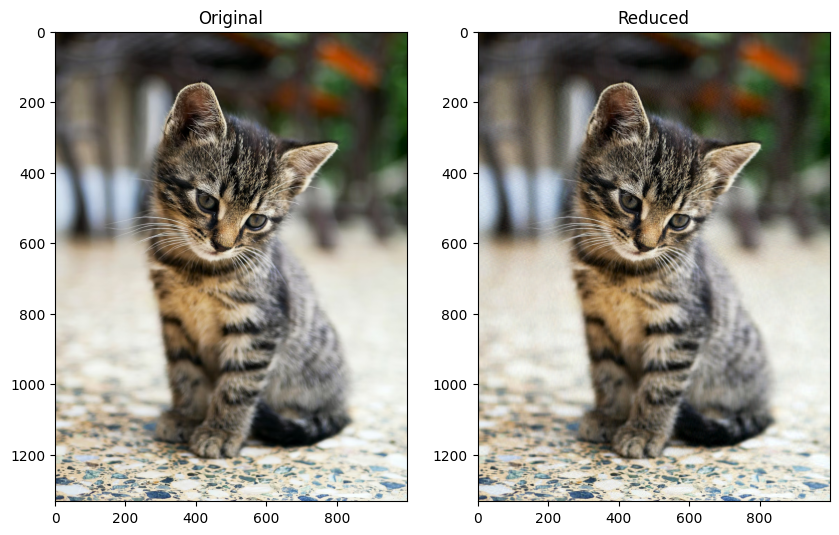

In [16]:
fig = plt.figure(figsize = (height, width))
fig.add_subplot(121)
plt.title("Original")
plt.imshow(image)

fig.add_subplot(122)
plt.title("Reduced")
plt.imshow(image_reduced)
plt.show()



Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


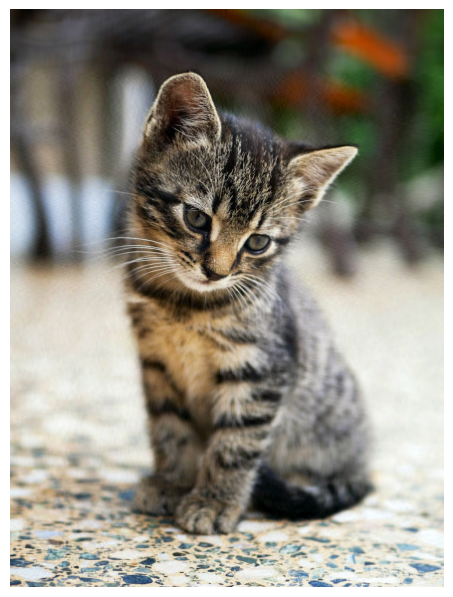

In [17]:
#Set figure size
fig = plt.figure(figsize = (height, width))
plt.imshow(image_reduced)

# Set background color to transparent
plt.gca().set_facecolor('None')  

# Turn off grid lines and axes
plt.grid(False)  
plt.axis('off') 

# Save and show the image
plt.savefig('cat_final.jpg', bbox_inches = 'tight', transparent=True)
plt.show()


In [18]:
# Calculate the original and final image sizes and show the amount saved
original_file_size_bytes = os.path.getsize('cat.jpg')
print("Original file size:", original_file_size_bytes, "bytes")
final_file_size_bytes = os.path.getsize('cat_final.jpg')
print("Final file size:", final_file_size_bytes, "bytes")
print("Difference:", original_file_size_bytes-final_file_size_bytes, "bytes")

Original file size: 776154 bytes
Final file size: 39398 bytes
Difference: 736756 bytes
